## Problème de MontyHall : 


**Enoncé** 


<img src="images/montyhall.png" alt="drawing" width="800"/>


- Il y a 3 portes. Derrière l'une d'elle se cache une voiture, derrière les deux autres se cachent des chèvres.
    - Le maître de cérémonie vous demande une première fois sur quelle porte vous souhaitez parier.
    - Ensuite, il élimine une des deux portes que vous n'avez pas choisi (toujours une derrière laquelle une chèvre se trouve).
    - Enfin, il vous propose de changer votre choix pour l'autre porte restante ou de rester sur votre première décision
    
    

**Question** 

- Quelle est la probabilité de gagner si on change systématiquement de porte ? Si on ne change jamais de porte ?
- Pour maximiser la probabilité de gagner, faut-il garder la même porte ou changer de porte ? 



**Méthode 1**
- Simuler informatiquement - on a codé un petit jeu :
    - on peut soit y jouer soi-même
    - soit laisser une ia y jouer

**Méthode 2**
- Par le calcul

In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class MontyHall:
    
    def __init__(self, user, n_games=100, verbose=False):
        self.n_games = n_games
        self.user = user
        self.verbose = verbose
        self.victory_count = 0
        
        
    def one_game(self):
        good_door = random.randint(1, 3)
        wrong_doors = [x for x in range(1, 4) if x != good_door]
        
        if self.user == "human":
            answer = None
            while answer not in [1, 2, 3]:
                print("Derrière quelle porte se cache la voiture ?")
                try:
                    answer = int(input())
                except:
                    print("Saisissez une valeur entre 1 et 3 s'il vous plait")
        
        elif self.user.startswith("ia"):
            answer = random.choice([1, 2, 3])
                  
        if answer == good_door:
            wrong_door_anounced = random.choice(wrong_doors)
        else:
            wrong_door_anounced = [x for x in wrong_doors if x != answer][0]
            
        new_answers = [x for x in [1, 2, 3] if x != wrong_door_anounced]
        new_answers.sort()
        
        if self.user == "human":
            print(wrong_door_anounced, "was a wrong door")
            print(f"Saisissez {new_answers[0]} ou {new_answers[1]}")
            new_answer = None
            while new_answer not in new_answers:
                print("Derrière quelle porte se cache la voiture ?")
                try:
                    new_answer = int(input())
                except:
                    print(f"Saisissez une valeur dans {' ,'.join(new_answers)} s'il vous plait")
                    
        elif self.user == "ia_dumb":
            new_answer = answer
            
        elif self.user == "ia_smart":
            new_answer = [x for x in new_answers if x != answer][0]
            
        if new_answer == good_door:
            self.victory_count += 1
            
        if (self.user.startswith("ia")) & (self.verbose):
            win = "VICTOIRE" if good_door == answer else "DEFAITE"
            print(f"{win} - la porte était {good_door} et vous avez choisi {answer} puis {new_answer}")
            
        if (self.user == "human" ) & (self.verbose):
            if new_answer == good_door:
                print("Vous avez gagné !!")
            else:
                print("Vous avez perdu")
        
            print("\n" + "#" * 10 + "\n")
            
    def many_games(self):
        for _ in range(self.n_games):
            self.one_game()

## Humain

In [3]:
mh = MontyHall(user="human", n_games=10, verbose=True)
mh.many_games()
print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")

Derrière quelle porte se cache la voiture ?


 1


2 was a wrong door
Saisissez 1 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 3


2 was a wrong door
Saisissez 1 ou 3
Derrière quelle porte se cache la voiture ?


 1


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 1


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 3


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez perdu

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 2


Vous avez perdu

##########

Derrière quelle porte se cache la voiture ?


 1


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 2


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 1


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 1


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 3


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 2


Vous avez perdu

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 1


Derrière quelle porte se cache la voiture ?


 3


Vous avez perdu

##########

6 victoire sur 10 parties - soit 60.00%


## IA - 10 000 parties pour chaque IA

IA :0
3348 victoire sur 10000 parties - soit 33.48%
IA :1
6701 victoire sur 10000 parties - soit 67.01%


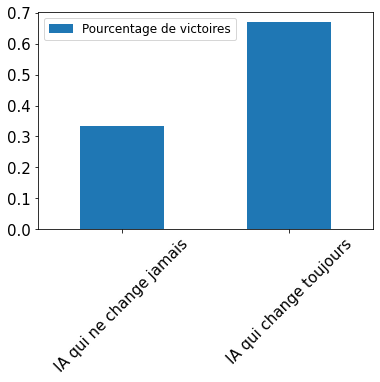

In [4]:
ia_1 = "ia_dumb"
ia_2 = "ia_smart"

stats_ia = {}
for idx, ia in enumerate([ia_1, ia_2]):
    mh = MontyHall(user=ia, n_games=10000, verbose=False)
    mh.many_games()
    print("IA :{}".format(idx))
    print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")
    stats_ia[ia] = (mh.victory_count / mh.n_games)
    
    
df = pd.DataFrame.from_dict(stats_ia, orient='index', columns=["Pourcentage de victoires"])
df = df.rename(index={ia_1:"IA qui ne change jamais", ia_2: "IA qui change toujours"})
df.plot.bar(rot=45, fontsize=15)
plt.legend(fontsize=12)
#plt.title("Pourcentage de victoire par IA")
plt.show()

## Evolution du pourcentage de parties gagnées en fonction du nombre de parties

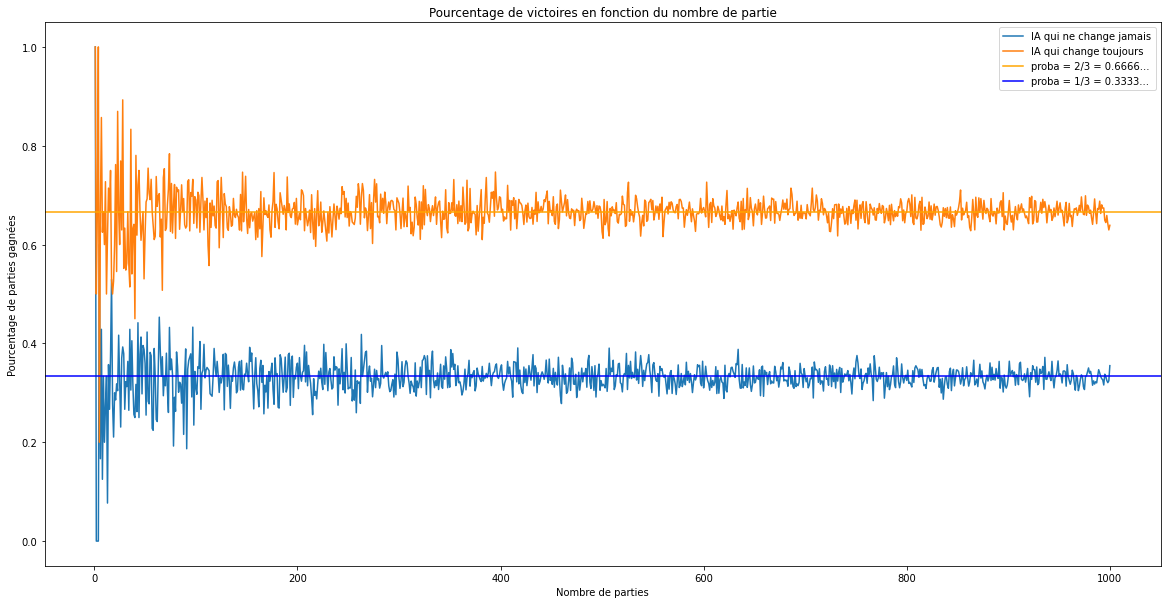

In [22]:
stats_ia = {ia_1: [], ia_2: []}
for x in range(1,1001):
    for ia in [ia_1, ia_2]:
        mh = MontyHall(user=ia, n_games=x)
        mh.many_games()
        #print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")
        stats_ia[ia].append(mh.victory_count / mh.n_games)
        
        
df = pd.DataFrame.from_dict(stats_ia, orient='index').T
df.index = range(1, 1001)
df = df.rename(columns={ia_1:"IA qui ne change jamais", ia_2: "IA qui change toujours"})
df.plot(figsize=(20,10))
plt.axhline(2/3, color='orange', label="proba = 2/3 = 0.6666...")
plt.axhline(1/3, color='blue', label="proba = 1/3 = 0.3333...")
plt.legend()
plt.title("Pourcentage de victoires en fonction du nombre de partie")
plt.xlabel("Nombre de parties")
plt.ylabel("Pourcentage de parties gagnées")
plt.show()

In [23]:
mh = MontyHall(user='ia_dumb', n_games=1000)
mh.many_games()
mh.victory_count

333